In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df2 = df.copy()

In [5]:
df2 = df2.drop(columns=df2.isnull().sum()[df2.isnull().sum()/df2.shape[0]*100>20].index,axis=1) # drop columns with more then 20 % nan values

In [6]:
df2.shape

(1460, 76)

In [7]:
df2.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [8]:
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [9]:
# we need domain knowledge to make refrence for a numerical variable
# ex-> I am assuming that LotConfig is refrence for LotFrontage 

In [10]:
df2['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [11]:
# we are updating duplicate data df2,if we have large ammount data then we can update original data
for var in df2['LotConfig'].unique():
    df2.update(df2[df['LotConfig']==var]['LotFrontage'].replace(np.nan,df2[df['LotConfig']==var]['LotFrontage'].mean()))

In [12]:
df2['LotFrontage'].isnull().sum()

0

In [13]:
df3 = df.copy()

In [14]:
df3 = df3.drop(columns=df3.isnull().sum()[df3.isnull().sum()/df3.shape[0]*100 > 20].index,axis=1)

In [15]:
num_var_missing = [var for var in df3.select_dtypes(['int64','float64']).columns if df3[var].isnull().sum()>0]
num_var_missing

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [16]:
num_var_miss = ['LotFrontage','MasVnrArea', 'GarageYrBlt']
cat_ref_vars = ['LotConfig','MasVnrType','GarageType'] # crossponing refrence variable
for num_var,cat_var in zip(num_var_miss,cat_ref_vars):
    for var in df3[cat_var].unique():
        print(num_var,cat_var,var)
        df3.update(df3[df3[cat_var]==var][num_var].replace(np.nan,df3[df3[cat_var]==var][num_var].mean()))

LotFrontage LotConfig Inside
LotFrontage LotConfig FR2
LotFrontage LotConfig Corner
LotFrontage LotConfig CulDSac
LotFrontage LotConfig FR3
MasVnrArea MasVnrType BrkFace
MasVnrArea MasVnrType None
MasVnrArea MasVnrType Stone
MasVnrArea MasVnrType BrkCmn
MasVnrArea MasVnrType nan
GarageYrBlt GarageType Attchd
GarageYrBlt GarageType Detchd
GarageYrBlt GarageType BuiltIn
GarageYrBlt GarageType CarPort
GarageYrBlt GarageType nan
GarageYrBlt GarageType Basment
GarageYrBlt GarageType 2Types


In [17]:
# the above code is fine but our categorical varibles have nan values
df3.select_dtypes(['int64','float64']).isnull().sum()

Id                0
MSSubClass        0
LotFrontage       0
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
MiscVal           0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [18]:
#lets change categorical refrence variable and than try
num_var_miss = ['LotFrontage','MasVnrArea', 'GarageYrBlt']
cat_ref_vars = ['LotConfig','Exterior2nd','KitchenQual'] # crossponing refrence variable
for num_var,cat_var in zip(num_var_miss,cat_ref_vars):
    for var in df3[cat_var].unique():
        print(num_var,cat_var,var)
        df3.update(df3[df3[cat_var]==var][num_var].replace(np.nan,df3[df3[cat_var]==var][num_var].mean()))#we can use median or any other constant value

LotFrontage LotConfig Inside
LotFrontage LotConfig FR2
LotFrontage LotConfig Corner
LotFrontage LotConfig CulDSac
LotFrontage LotConfig FR3
MasVnrArea Exterior2nd VinylSd
MasVnrArea Exterior2nd MetalSd
MasVnrArea Exterior2nd Wd Shng
MasVnrArea Exterior2nd HdBoard
MasVnrArea Exterior2nd Plywood
MasVnrArea Exterior2nd Wd Sdng
MasVnrArea Exterior2nd CmentBd
MasVnrArea Exterior2nd BrkFace
MasVnrArea Exterior2nd Stucco
MasVnrArea Exterior2nd AsbShng
MasVnrArea Exterior2nd Brk Cmn
MasVnrArea Exterior2nd ImStucc
MasVnrArea Exterior2nd AsphShn
MasVnrArea Exterior2nd Stone
MasVnrArea Exterior2nd Other
MasVnrArea Exterior2nd CBlock
GarageYrBlt KitchenQual Gd
GarageYrBlt KitchenQual TA
GarageYrBlt KitchenQual Ex
GarageYrBlt KitchenQual Fa


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


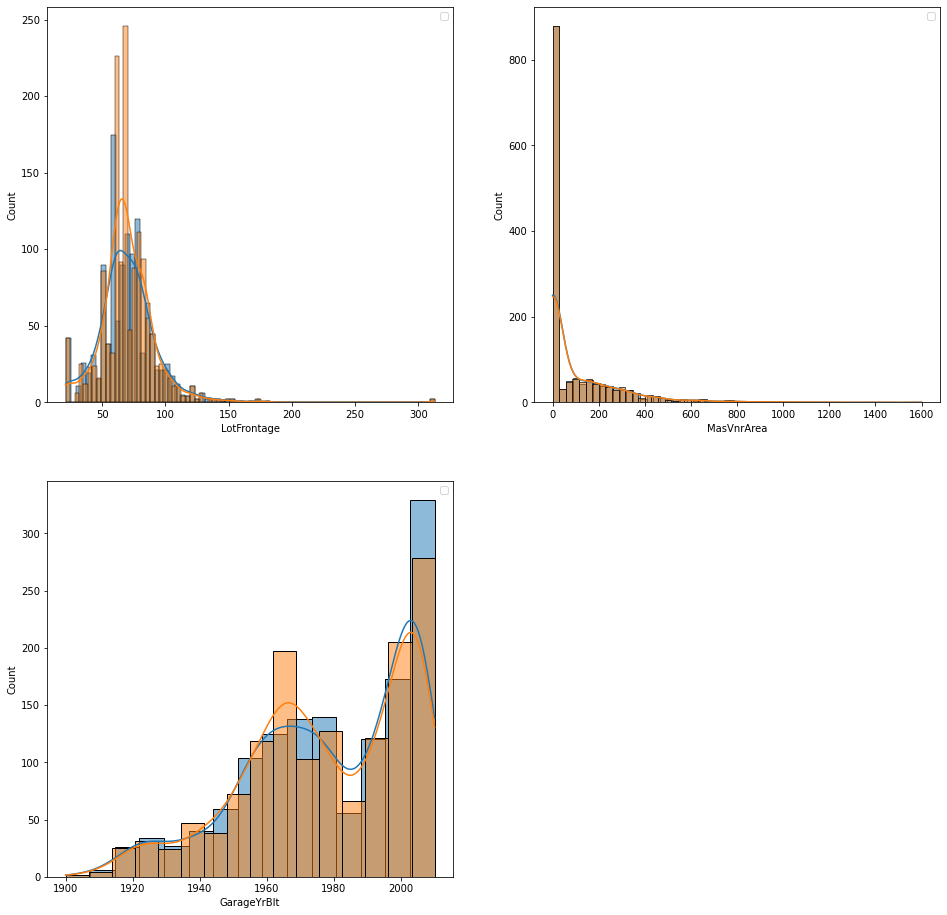

In [19]:
#lets compare data distribution for original data and cleaned data
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
for i,var in enumerate(num_var_miss):
    plt.subplot(2,2,i+1)
    sns.histplot(df[var],kde=True)
    sns.histplot(df3[var],kde=True)
    plt.legend()

Kalu Ram Kharra --> Follow me for more creative codes